In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

# 가설검정
from scipy import stats

# 경고문구 무시
import warnings
warnings.filterwarnings("ignore")
# 자연어 처리
# import spacy

In [2]:
df=pd.read_csv('../data/1_original_useDf_0711.csv')

In [3]:
df.head(1)

,Unnamed: 0,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,7.3,96.0,91.0,96.0,97.0,"$56,441,711",2020.10.23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0


In [4]:
#df.info()
df.isnull().sum()

Unnamed: 0                  0
Title                       0
Series or Movie             0
COUNTRY                   206
Release Date               65
GENRE                     370
VALUE                       0
Genre_all                 118
Tags                        9
Languages                 149
Hidden Gem Score          152
Country Availability        5
Runtime                     0
Director                  713
Writer                    514
Actors                    138
View Rating               708
IMDb Score                152
Rotten Tomatoes Score    1385
Metacritic Score         1510
Awards Received          1490
Awards Nominated For     1090
Boxoffice                1665
Netflix Release Date        0
Production House         1492
Summary                     2
IMDb Votes                152
dtype: int64

In [5]:
df.describe().round()

,Unnamed: 0,VALUE,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,2960.0,2960.0,2808.0,2808.0,1575.0,1450.0,1470.0,1870.0,2808.0
mean,1480.0,634.0,5.0,6.0,54.0,54.0,11.0,21.0,94402.0
std,855.0,2202.0,2.0,1.0,27.0,17.0,24.0,41.0,190158.0
min,0.0,1.0,1.0,2.0,0.0,5.0,1.0,1.0,5.0
25%,740.0,22.0,3.0,6.0,30.0,41.0,2.0,3.0,1759.0
50%,1480.0,80.0,4.0,6.0,54.0,53.0,4.0,7.0,17586.0
75%,2219.0,321.0,7.0,7.0,78.0,66.0,10.0,19.0,107313.0
max,2959.0,44867.0,10.0,10.0,100.0,100.0,300.0,386.0,2308981.0


# viewpoint 정규화

In [6]:
df['VALUE_std']=(df['VALUE']-df['VALUE'].min())/df['VALUE'].max()

In [7]:
df['VALUE_norm']=(df['VALUE']-df['VALUE'].mean())/df['VALUE'].std()

# Country_all 변수 추가 (country 와 Country Availability 결합)

In [8]:
df['country_all']=df['COUNTRY']+','+df['Country Availability'] # (?)country_all에 중복되는 문자열 골라내기 

In [9]:
df

,Unnamed: 0,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes,VALUE_std,VALUE_norm,country_all
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,96.0,97.0,"$56,441,711",2020.10.23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0,0.999978,20.086441,"United States,Lithuania,Canada,Australia,Polan..."
1,1,365days,Movie,Poland,2020.6.7,Romance,42149,"Drama, Romance","Polish Movies,Polish Dramas,Dramas,Romantic Dr...","Polish, English, Italian",...,NaN,NaN,NaN,2020.4.2,NaN,A fiery executive in a spiritless relationship...,50125.0,0.939399,18.852190,"Poland,Poland,Russia,United Kingdom,Slovakia,C..."
2,2,emilyinparis,TV,United States,2020.10.2,Drama,27138,"Comedy, Drama, Romance","Comedy Programmes,Drama Programmes,Romantic TV...","French, English",...,1.0,3.0,NaN,2020.10.2,NaN,"After landing her dream job in Paris, Chicago ...",45000.0,0.604832,12.035656,"United States,Canada,Lithuania,Australia,Polan..."
3,3,lucifer,TV,United States,2016.1.25,Superhero,25729,"Horror, Thriller","TV Dramas,Police TV Shows,TV Sci-Fi & Fantasy,...",English,...,NaN,NaN,NaN,2017.7.24,NaN,"Bored with being the Lord of Hell, the devil r...",57.0,0.573428,11.395826,"United States,South Korea,Iceland,Hungary,Aust..."
4,4,theumbrellaacademy,TV,United States,2019.2.15,Superhero,23480,"Action, Adventure, Comedy, Drama, Fantasy, Sci-Fi","TV Sci-Fi & Fantasy,US TV Shows,TV Action & Ad...",English,...,7.0,28.0,NaN,2019.2.15,NaN,"Reunited by their fathers death, estranged sib...",159677.0,0.523302,10.374549,"United States,Lithuania,Brazil,Israel,Spain,Sl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,2955,thebournesupremacy,Movie,United States,2004.7.23,Action,1,"Action, Mystery, Thriller","Action Thrillers,Spy Action & Adventure,Action...","English, Russian, German, Italian",...,5.0,22.0,"$176,241,941",2015.4.14,"Universal Pictures, Hypnotic, Kennedy/Marshall","Flushed from his refuge by an assassin, Jason ...",435887.0,0.000000,-0.287326,"United States,Japan,France,Russia,South Korea,..."
2956,2956,justfriends,Movie,United States,2005.11.23,Romance,1,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...",English,...,NaN,3.0,"$32,619,671",2015.4.14,"Cinerenta, Benderspink, Just Friends Productio...","Years after high school, a once-portly nice gu...",106951.0,0.000000,-0.287326,"United States,Romania,South Korea,United Kingd..."
2957,2957,child44,Movie,United States,2015.3.15,Thriller,1,"Crime, Drama, History, Mystery, Thriller","Dramas based on a book,Dramas,Thrillers,Crime ...","English, Russian",...,NaN,2.0,"$1,224,330",2016.12.4,Scott Free Productions,"In 1950s Russia, a former war hero investigate...",66251.0,0.000000,-0.287326,"United States,Germany,India"
2958,2958,draculauntold,Movie,United States,2014.10.3,Horror,1,"Action, Drama, Fantasy, Horror, War","Horror Movies,Sci-Fi & Fantasy,Action & Advent...","English, Turkish",...,3.0,5.0,"$56,280,355",2016.3.28,Michael De Luca,A medieval warrior and ruler must become a vam...,180432.0,0.000000,-0.287326,"United States,Switzerland,Canada,Poland,Italy,..."


In [10]:
df['country_all'].head(3)

0    United States,Lithuania,Canada,Australia,Polan...
1    Poland,Poland,Russia,United Kingdom,Slovakia,C...
2    United States,Canada,Lithuania,Australia,Polan...
Name: country_all, dtype: object

# showingOn_count 변수 추가

In [11]:
len(str(df['country_all'].iloc[0]).split(','))

37

In [12]:
rows = len(df['country_all'])

In [13]:
df['showingOn_count'] = 0

In [14]:
for i in range(rows):
    df.showingOn_count[i]=len(str(df['country_all'].iloc[i]).split(','))

In [15]:
df.head(5)

,Unnamed: 0,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,Awards Nominated For,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes,VALUE_std,VALUE_norm,country_all,showingOn_count
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,97.0,"$56,441,711",2020.10.23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0,0.999978,20.086441,"United States,Lithuania,Canada,Australia,Polan...",37
1,1,365days,Movie,Poland,2020.6.7,Romance,42149,"Drama, Romance","Polish Movies,Polish Dramas,Dramas,Romantic Dr...","Polish, English, Italian",...,NaN,NaN,2020.4.2,NaN,A fiery executive in a spiritless relationship...,50125.0,0.939399,18.852190,"Poland,Poland,Russia,United Kingdom,Slovakia,C...",37
2,2,emilyinparis,TV,United States,2020.10.2,Drama,27138,"Comedy, Drama, Romance","Comedy Programmes,Drama Programmes,Romantic TV...","French, English",...,3.0,NaN,2020.10.2,NaN,"After landing her dream job in Paris, Chicago ...",45000.0,0.604832,12.035656,"United States,Canada,Lithuania,Australia,Polan...",37
3,3,lucifer,TV,United States,2016.1.25,Superhero,25729,"Horror, Thriller","TV Dramas,Police TV Shows,TV Sci-Fi & Fantasy,...",English,...,NaN,NaN,2017.7.24,NaN,"Bored with being the Lord of Hell, the devil r...",57.0,0.573428,11.395826,"United States,South Korea,Iceland,Hungary,Aust...",36
4,4,theumbrellaacademy,TV,United States,2019.2.15,Superhero,23480,"Action, Adventure, Comedy, Drama, Fantasy, Sci-Fi","TV Sci-Fi & Fantasy,US TV Shows,TV Action & Ad...",English,...,28.0,NaN,2019.2.15,NaN,"Reunited by their fathers death, estranged sib...",159677.0,0.523302,10.374549,"United States,Lithuania,Brazil,Israel,Spain,Sl...",37


In [16]:
# 정규화 진행

df['showingOn_count_norm'] = (df['showingOn_count'] - df['showingOn_count'].min())/df['showingOn_count'].max()  ## 

In [17]:
type(df.showingOn_count)

pandas.core.series.Series

In [18]:
#df.showingOn_count = df.showingOn_count.reshape

In [19]:
df.showingOn_count.isnull().sum()

0

In [20]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# showingOn_count_norm2=scaler.fit(df.showingOn_count)

# 상영 국가 수와 viewpoint

In [21]:
df.head(1)

,Unnamed: 0,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes,VALUE_std,VALUE_norm,country_all,showingOn_count,showingOn_count_norm
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,"$56,441,711",2020.10.23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0,0.999978,20.086441,"United States,Lithuania,Canada,Australia,Polan...",37,0.972973


In [22]:
df_count = df[['VALUE','showingOn_count']]

In [23]:
df_count.isnull().sum()

VALUE              0
showingOn_count    0
dtype: int64

In [24]:
df_count.describe()

,VALUE,showingOn_count
count,2960.000000,2960.000000
mean,633.733446,16.586486
std,2202.145547,14.264150
min,1.000000,1.000000
25%,22.000000,3.000000
50%,80.000000,11.000000
75%,321.000000,35.000000
max,44867.000000,37.000000


## 카이제곱 검정
- 귀무가설 : 두 변수는 연관성이 없다. 차이가 없다.
 - => showingOn_count의 증감은 value와 상관성이 없다.
- 대립가설 : 두 변수는 연관성이 있다. 차이가 있다.
 - => showingOn_count의 증감은 value와 상관성이 있다.

In [25]:
value = list(df_count.VALUE)
showingOn_count=list(df_count.showingOn_count)

In [26]:
chis = stats.chisquare(value,showingOn_count)

In [27]:
statistic, pvalue = chis
print(f'static : {statistic}, p-value : {pvalue}')
if pvalue < 0.05 :
    print('신뢰수준하에서 유의한 관계. 대립가설 채택')
else :
    print('신뢰수준하에서 무의미한 관계. 귀무가설 채택')

static : 626914944.2961658, p-value : 0.0
신뢰수준하에서 유의한 관계. 대립가설 채택


In [28]:
corr=stats.pearsonr(df_count.VALUE, df_count.showingOn_count)
corr

(0.2654306480334703, 6.509895976508205e-49)

In [29]:
corr1=stats.spearmanr(df_count.VALUE, df_count.showingOn_count)
corr1

SpearmanrResult(correlation=0.3756960524649637, pvalue=7.182035682261628e-100)

In [30]:
df_count.corr(method='spearman')

,VALUE,showingOn_count
VALUE,1.000000,0.375696
showingOn_count,0.375696,1.000000


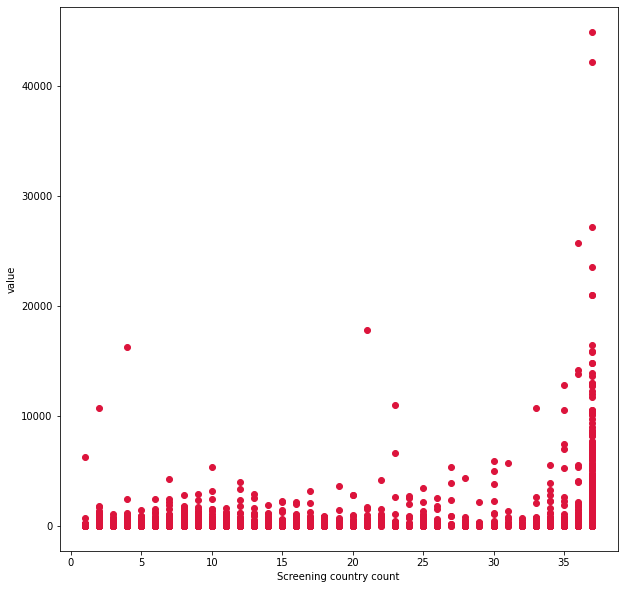

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(showingOn_count,value, c='crimson')
plt.xlabel('Screening country count')
plt.ylabel('value')
#plt.axis([0, 40, 0, 20000]) #구간 설정
plt.show()

- 카이 제곱 검정 결과 두 변수들간의 유의수준 0.05에서 showingOn_count의 증감은 value와의 상관성이 있다고 할 수 있다.
- 산점도와 상관계수를 확인을 해봤을 때, 양의 상관성이 있다고 볼 수 있다.

In [32]:
import seaborn as sns

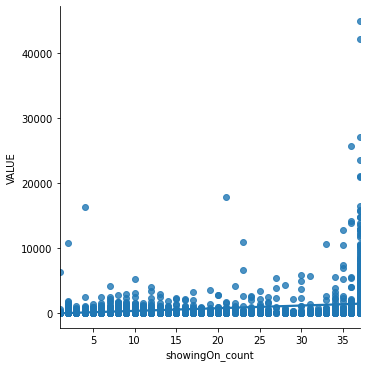

<Figure size 720x720 with 0 Axes>

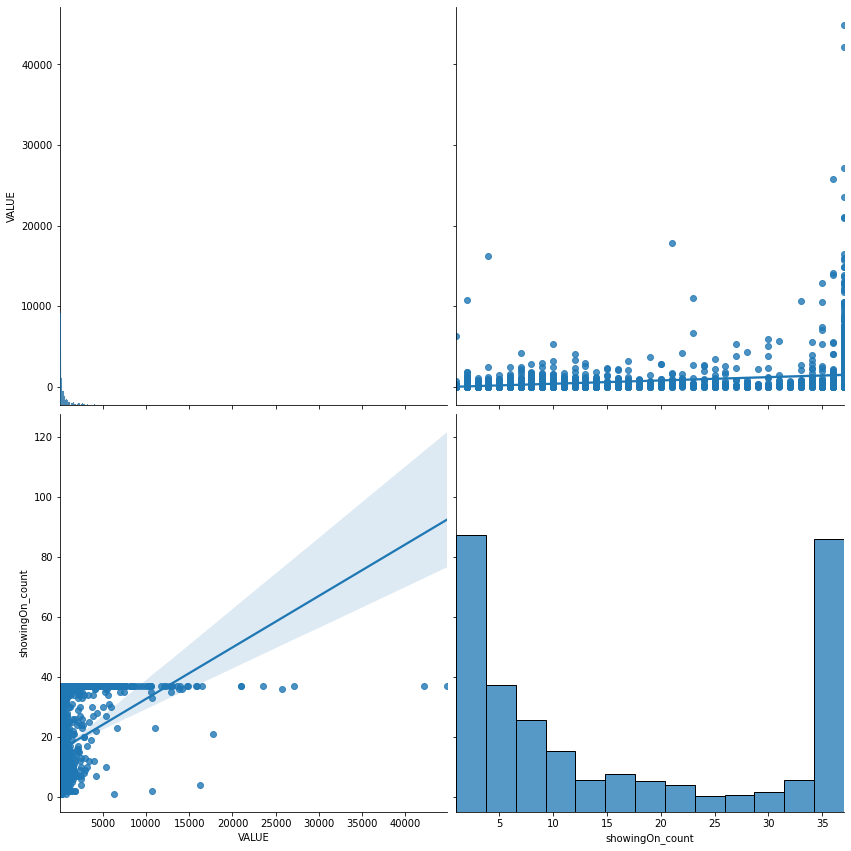

In [33]:
import seaborn as sns
ax=sns.lmplot(x='showingOn_count', y='VALUE', data=df_count, ci=None)
plt.figure(figsize=(10,10))

sns.pairplot(df_count, kind='reg', height=6)

In [34]:
import pandas_profiling

In [35]:
import pandas_profiling
df_count.profile_report()

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 상영 국가들과 viewpoint
- 귀무가설 : 상영국가들은 viewpoint에 영향이 없다.
- 대립가설 : 상영국가들은 viewpoint에 영향이 있다.

In [36]:
df_showOn= df[['VALUE','country_all']]

In [37]:
df_showOn.head()

,VALUE,country_all
0,44867,"United States,Lithuania,Canada,Australia,Polan..."
1,42149,"Poland,Poland,Russia,United Kingdom,Slovakia,C..."
2,27138,"United States,Canada,Lithuania,Australia,Polan..."
3,25729,"United States,South Korea,Iceland,Hungary,Aust..."
4,23480,"United States,Lithuania,Brazil,Israel,Spain,Sl..."


In [38]:
df_showOn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   VALUE        2960 non-null   int64 
 1   country_all  2749 non-null   object
dtypes: int64(1), object(1)
memory usage: 46.4+ KB


In [39]:
df_showOn.isnull().sum()

VALUE            0
country_all    211
dtype: int64

In [40]:
df_showOn.describe

<bound method NDFrame.describe of       VALUE                                        country_all
0     44867  United States,Lithuania,Canada,Australia,Polan...
1     42149  Poland,Poland,Russia,United Kingdom,Slovakia,C...
2     27138  United States,Canada,Lithuania,Australia,Polan...
3     25729  United States,South Korea,Iceland,Hungary,Aust...
4     23480  United States,Lithuania,Brazil,Israel,Spain,Sl...
...     ...                                                ...
2955      1  United States,Japan,France,Russia,South Korea,...
2956      1  United States,Romania,South Korea,United Kingd...
2957      1                        United States,Germany,India
2958      1  United States,Switzerland,Canada,Poland,Italy,...
2959      1  United States,Japan,United Kingdom,Mexico,Cana...

[2960 rows x 2 columns]>

In [41]:
df_showOn.set_index('VALUE',inplace=True)

In [42]:
result = df_showOn['country_all'].str.split(',') #리스트화

In [43]:
result = result.apply(lambda x : pd.Series(x))

In [44]:
result.stack()

VALUE    
44867  0     United States
       1         Lithuania
       2            Canada
       3         Australia
       4            Poland
                 ...      
1      7            Poland
       8         Singapore
       9         Argentina
       10         Malaysia
       11         Colombia
Length: 48885, dtype: object

In [45]:
result.stack().reset_index(level=1, drop=True)

VALUE
44867    United States
44867        Lithuania
44867           Canada
44867        Australia
44867           Poland
             ...      
1               Poland
1            Singapore
1            Argentina
1             Malaysia
1             Colombia
Length: 48885, dtype: object

In [46]:
result = result.stack().reset_index(level=1, drop=True).to_frame('showOn_single')
result

,showOn_single
VALUE,
44867,United States
44867,Lithuania
44867,Canada
44867,Australia
44867,Poland
...,...
1,Poland
1,Singapore
1,Argentina


In [47]:
rs=result.reset_index()

In [48]:
rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48885 entries, 0 to 48884
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VALUE          48885 non-null  int64 
 1   showOn_single  48885 non-null  object
dtypes: int64(1), object(1)
memory usage: 764.0+ KB


In [49]:
len(list(rs.showOn_single.unique()))

68

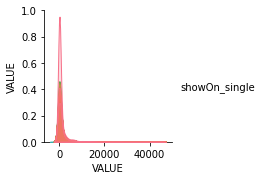

In [50]:
from copy import copy
exiris = copy(rs)
sns.pairplot(exiris, hue="showOn_single")

In [51]:
df_showOn.describe

<bound method NDFrame.describe of                                              country_all
VALUE                                                   
44867  United States,Lithuania,Canada,Australia,Polan...
42149  Poland,Poland,Russia,United Kingdom,Slovakia,C...
27138  United States,Canada,Lithuania,Australia,Polan...
25729  United States,South Korea,Iceland,Hungary,Aust...
23480  United States,Lithuania,Brazil,Israel,Spain,Sl...
...                                                  ...
1      United States,Japan,France,Russia,South Korea,...
1      United States,Romania,South Korea,United Kingd...
1                            United States,Germany,India
1      United States,Switzerland,Canada,Poland,Italy,...
1      United States,Japan,United Kingdom,Mexico,Cana...

[2960 rows x 1 columns]>

In [53]:
rs.head(1)

,VALUE,showOn_single
0,44867,United States


In [54]:
top1000_country = rs[:1000]

In [ ]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])

sns.barplot(top1000_country.index, top1000_country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20_country.index, rotation='90')
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')